In [17]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
asse='TSLA'
st='2018-01-01'
today='2019-01-01'
data=yf.Ticker(asse)
stock=data.history(start=st, end=today, period='d')
stock['20 Day MA'] = stock['Close'].rolling(window=20).mean()
stock['20 Day STD'] = stock['Close'].rolling(window=20).std() 
stock['Upper Band'] = stock['20 Day MA'] + (stock['20 Day STD'] * 2)
stock['Lower Band'] = stock['20 Day MA'] - (stock['20 Day STD'] * 2)
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,20 Day MA,20 Day STD,Upper Band,Lower Band
Date,,,,,,,,,,,
2018-01-02,312.00,322.11,311.00,320.53,4352200,0,0,NaN,NaN,NaN,NaN
2018-01-03,321.00,325.25,315.55,317.25,4521500,0,0,NaN,NaN,NaN,NaN
2018-01-04,312.87,318.55,305.68,314.62,9946300,0,0,NaN,NaN,NaN,NaN
2018-01-05,316.62,317.24,312.00,316.58,4591200,0,0,NaN,NaN,NaN,NaN
2018-01-08,316.00,337.02,315.50,336.41,9859400,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,313.50,314.50,295.20,295.39,5559900,0,0,347.9315,20.204558,388.340616,307.522384
2018-12-26,300.00,326.97,294.09,326.09,8163100,0,0,346.9360,20.786837,388.509674,305.362326
2018-12-27,319.84,322.17,301.50,316.13,8575100,0,0,345.5465,21.898160,389.342819,301.750181


Budget -> 15000$
Profit -> 15332.7$
Returns -> 102.218%
Time Frame -> 316 days


C:\Users\91911\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\91911\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\91911\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


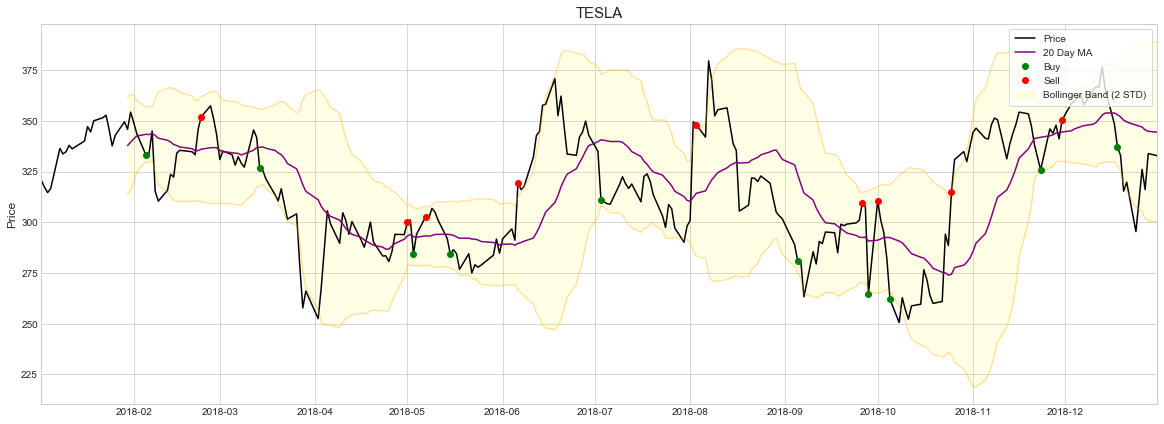

In [20]:
def plotting(stock, net, std=2):    
    
    # Bollinger band plot with EMA and original historical data
    plt.figure(figsize=(20,7))
    plt.style.use('seaborn-whitegrid')
    plt.plot(stock.index, stock['Close'], color='black', label='Price')
    plt.plot(stock.index, stock['20 Day MA'], color='purple', label='20 Day MA')
    plt.plot(stock.index, stock['Upper Band'], color='orange', alpha=0.3)
    plt.plot(stock.index, stock['Lower Band'], color='orange', alpha=0.3)
    plt.fill_between(stock.index, stock['Upper Band'], stock['Lower Band'], color='yellow', alpha=0.1, label='Bollinger Band ({} STD)'.format(std))
    
    plt.title('TESLA', fontSize=15)
    plt.ylabel('Price', fontSize=12)
    plt.xlim([stock.index.min(), stock.index.max()])
    
    for i in net:
        if i[2] == 1: color = 'green'
        else: color = 'red'
        plt.plot_date(i[0], i[1], color=color)
        
    plt.plot_date([],[],label='Buy', c='green')
    plt.plot_date([],[],label='Sell', c='red')
        
    plt.legend(frameon=True, loc=1, ncol=1, fontsize=10, borderpad=.6)
    plt.show()
budget=15000
u=0.03
l=0.03
money = budget
net = []
Date=stock.index
for i in range(len(stock)):        
    # Buy
    if (stock['Close'][i] < stock['20 Day MA'][i]) and (abs(1 - stock['Close'][i] / stock['Lower Band'][i]) < u):
        if money > 0:
            stock_amt = int(money / stock['Close'][i])
            money = 0
            net.append([stock.index[i], stock['Close'][i], 1, stock_amt * stock['Close'][i]])

    # Sell        
    if (stock['Close'][i] > stock['20 Day MA'][i]) and (abs(1 - stock['Upper Band'][i] / stock['Close'][i]) < l):
        if money == 0:
            money = stock_amt * stock['Close'][i]
            stock_amt = 0
            net.append([stock.index[i], stock['Close'][i], 0, money])
            
profit = net[-1][3] - budget
print('Budget -> 15000$')
print('Profit ->',round(profit,3),'\b$')
print('Returns ->',round(profit*100/budget,3),'\b%')
print('Time Frame -> {} days'.format((net[-1][0] - net[0][0]).days))
plotting(stock, net)